In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [81]:
## Simul definitions
dt = 0.005

## Physical units
epsilon = 1.65e-21
sigma = 3.4e-10
kB = 1.38e-23
m_argon = 6.63e-26

## Time units
t_units = 1e-12 ## pico seconds
tau_convertion = dt * sigma * np.sqrt(m_argon / epsilon) / t_units
time_unit_label = 'ps'

## Distance units
r_units = 1e-10 ## pico seconds
r_convertion = sigma / r_units
distance_unit_label = 'Å'

In [82]:
T = 0.71
T * epsilon / kB

84.8913043478261

In [123]:
RHO_ = [1]

data_dicc = {}
for rho__ in RHO_:
    ## Simul details
    T = 0.71
    M = 6
    RHO = rho__
    N = 4*(M**3)
    L = (N / RHO) ** (1/3)

    ## Simul label
    label =  f'T{T}_N{M}_RHO{RHO}'

    ## Load Data
    RDF = pd.read_csv(f'../output_files/{label}/{label}_rdf_data.txt', sep='\t', names=['time', 'r', 'rdf'])
    VAF = pd.read_csv(f'../output_files/{label}/{label}_vaf_data.txt', sep='\t', names=['time', 'vaf'])
    MSD = pd.read_csv(f'../output_files/{label}/{label}_msd_data.txt', sep='\t', names=['time', 'msd'])

    Nt_steps = len(np.unique(RDF.time))
    RDF_ = RDF[['r', 'rdf']].groupby(by='r').sum().reset_index()
    RDF_['rdf'] = RDF_['rdf'] / Nt_steps

    data_dicc[label] = {'RDF' : RDF_,
                        'VAF' : VAF,
                        'MSD' : MSD,}

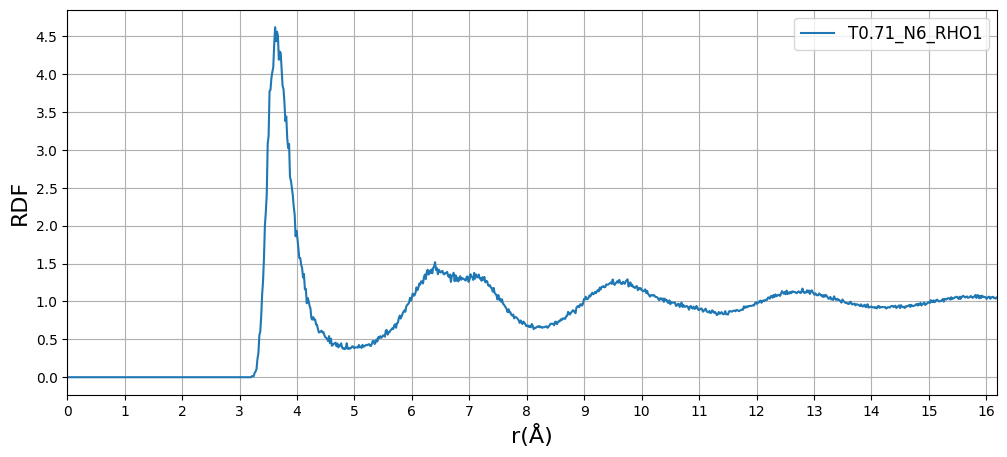

In [124]:
plt.figure(figsize=(12, 5))

plt.rc('font', size=12)  
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=10)  
plt.rc('ytick', labelsize=10)

plt.xlabel(f'r({distance_unit_label})', fontsize=16)
plt.ylabel('RDF', fontsize=16)

plt.xlim(0, r_convertion * L / 2)
#plt.ylim(0, 8)

for key in data_dicc.keys():
    df_ = data_dicc[key]['RDF']
    plt.plot(r_convertion * df_.r, df_.rdf, label = key)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1.0))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.legend()
plt.grid()

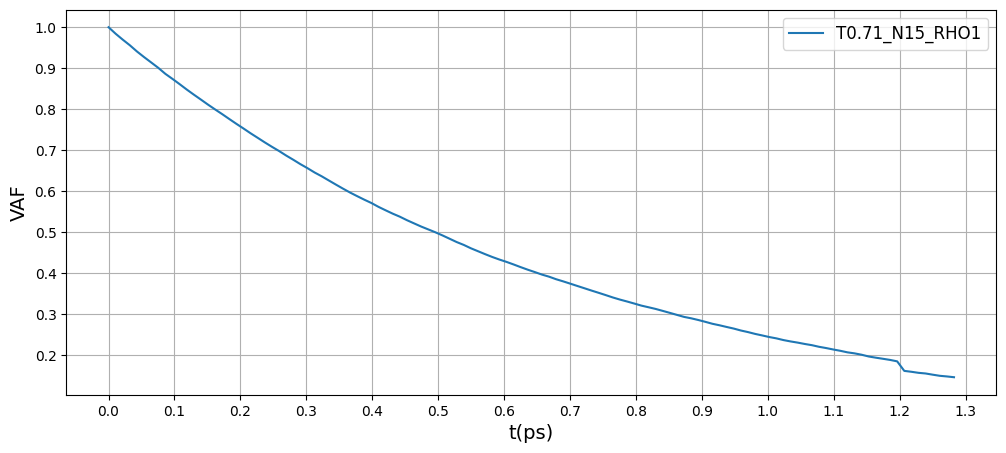

In [89]:
plt.figure(figsize=(12, 5))

plt.rc('font', size=12)  
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=10)  
plt.rc('ytick', labelsize=10)

plt.xlabel(f't({time_unit_label})')
plt.ylabel('VAF')

for key in data_dicc.keys():
    df_ = data_dicc[key]['VAF']
    plt.plot(tau_convertion * df_.time, df_.vaf, label = key)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))

plt.legend()
plt.grid()

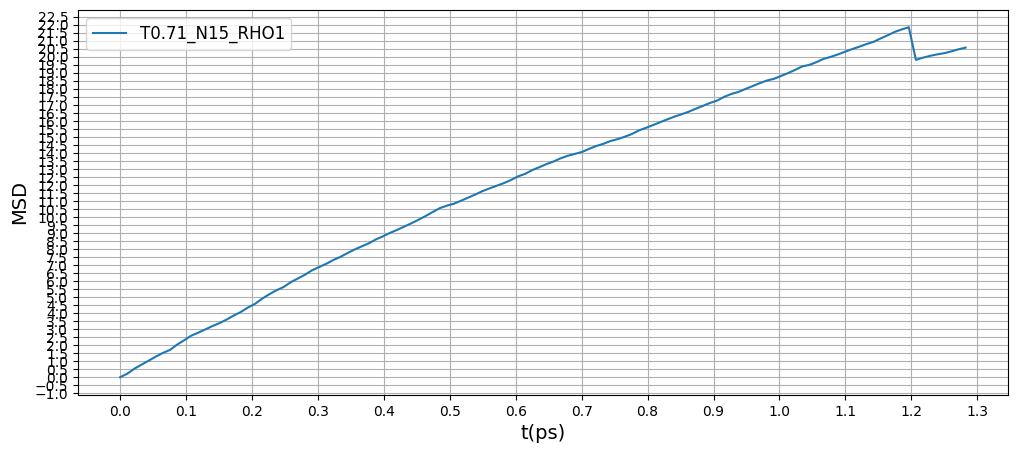

In [90]:
plt.figure(figsize=(12, 5))

plt.rc('font', size=12)  
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=10)  
plt.rc('ytick', labelsize=10)

plt.xlabel(f't({time_unit_label})')
plt.ylabel('MSD')

for key in data_dicc.keys():
    df_ = data_dicc[key]['MSD']
    plt.plot(tau_convertion * df_.time, df_.msd, label = key)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.legend()
plt.grid()

In [76]:
import matplotlib.animation as animation

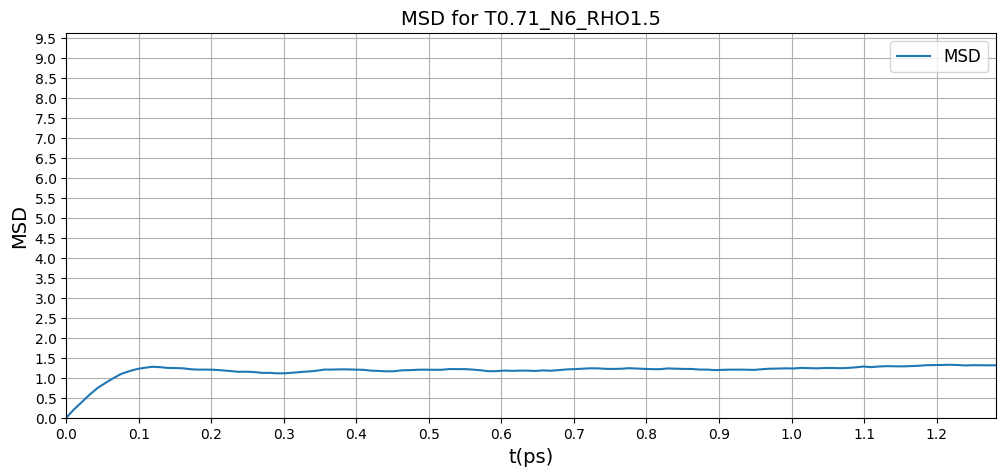

In [77]:
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(12, 5))

# Set the style
plt.rc('font', size=12)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Set labels and title
ax.set_xlabel(f't({time_unit_label})', fontsize=14)
ax.set_ylabel('MSD', fontsize=14)

# Set the grid
ax.grid()

# Initialize a line object with empty data
line, = ax.plot([], [], label='MSD')

# Determine global axis ranges
global_time_min = min(data_dicc[key]['MSD']['time'].min() for key in data_dicc.keys())
global_time_max = max(data_dicc[key]['MSD']['time'].max() for key in data_dicc.keys())
global_msd_min = min(data_dicc[key]['MSD']['msd'].min() for key in data_dicc.keys())
global_msd_max = max(data_dicc[key]['MSD']['msd'].max() for key in data_dicc.keys())

# Set the axis limits and ticks
ax.set_xlim(global_time_min * tau_convertion, global_time_max * tau_convertion)
ax.set_ylim(global_msd_min, global_msd_max)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# Add legend
ax.legend()

# Define the animation update function
def animate(i):
    key = list(data_dicc.keys())[i % len(data_dicc)]
    df_ = data_dicc[key]['MSD']
    x = tau_convertion * df_['time']
    y = df_['msd']
    line.set_data(x, y)
    ax.set_title(f'MSD for {key}')  # Update the title with the current key
    return line,

# Initialize the animation function
def init():
    line.set_data([], [])
    return line,

# Create the animation object
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(data_dicc), interval=500, blit=True)

# Save the animation
anim.save('msd_animation.mp4', fps=2, extra_args=['-vcodec', 'libx264'])


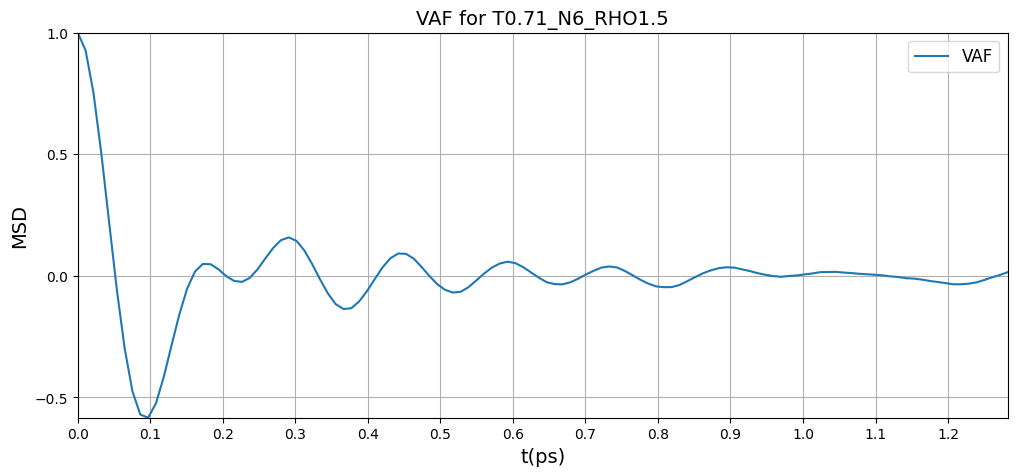

In [78]:
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(12, 5))

# Set the style
plt.rc('font', size=12)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Set labels and title
ax.set_xlabel(f't({time_unit_label})', fontsize=14)
ax.set_ylabel('MSD', fontsize=14)

# Set the grid
ax.grid()

# Initialize a line object with empty data
line, = ax.plot([], [], label='VAF')

# Determine global axis ranges
global_time_min = min(data_dicc[key]['VAF']['time'].min() for key in data_dicc.keys())
global_time_max = max(data_dicc[key]['VAF']['time'].max() for key in data_dicc.keys())
global_msd_min = min(data_dicc[key]['VAF']['vaf'].min() for key in data_dicc.keys())
global_msd_max = max(data_dicc[key]['VAF']['vaf'].max() for key in data_dicc.keys())

# Set the axis limits and ticks
ax.set_xlim(global_time_min * tau_convertion, global_time_max * tau_convertion)
ax.set_ylim(global_msd_min, global_msd_max)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# Add legend
ax.legend()

# Define the animation update function
def animate(i):
    key = list(data_dicc.keys())[i % len(data_dicc)]
    df_ = data_dicc[key]['VAF']
    x = tau_convertion * df_['time']
    y = df_['vaf']
    line.set_data(x, y)
    ax.set_title(f'VAF for {key}')  # Update the title with the current key
    return line,

# Initialize the animation function
def init():
    line.set_data([], [])
    return line,

# Create the animation object
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(data_dicc), interval=500, blit=True)

# Save the animation
anim.save('vaf_animation.mp4', fps=2, extra_args=['-vcodec', 'libx264'])


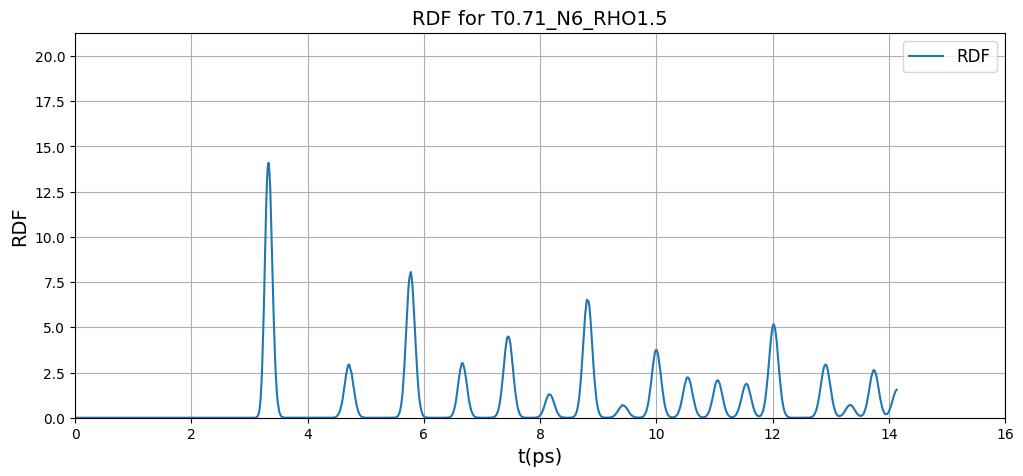

In [79]:
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(12, 5))

# Set the style
plt.rc('font', size=12)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Set labels and title
ax.set_xlabel(f't({time_unit_label})', fontsize=14)
ax.set_ylabel('RDF', fontsize=14)

# Set the grid
ax.grid()

# Initialize a line object with empty data
line, = ax.plot([], [], label='RDF')

# Determine global axis ranges
global_time_min = min(data_dicc[key]['RDF']['r'].min() for key in data_dicc.keys())
global_time_max = max(data_dicc[key]['RDF']['r'].max() for key in data_dicc.keys())
global_msd_min = min(data_dicc[key]['RDF']['rdf'].min() for key in data_dicc.keys())
global_msd_max = max(data_dicc[key]['RDF']['rdf'].max() for key in data_dicc.keys())

# Set the axis limits and ticks
ax.set_xlim(0, 16)
ax.set_ylim(global_msd_min, global_msd_max)

# Add legend
ax.legend()

# Define the animation update function
def animate(i):
    key = list(data_dicc.keys())[i % len(data_dicc)]
    df_ = data_dicc[key]['RDF']
    x = r_convertion * df_['r']
    y = df_['rdf']
    line.set_data(x, y)
    ax.set_title(f'RDF for {key}')  # Update the title with the current key
    return line,

# Initialize the animation function
def init():
    line.set_data([], [])
    return line,

# Create the animation object
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(data_dicc), interval=500, blit=True)

# Save the animation
anim.save('rdf_animation.mp4', fps=2, extra_args=['-vcodec', 'libx264'])